# Extracting embeddings from pre-trainedBERT

Le modèle pré-entraîné est également disponible dans les formats BERT uncased   et BERT uncased . Dans BERT uncased , tous les jetons sont en minuscules, mais dans BERT cased , les jetons ne sont pas en minuscules et sont utilisés directement pour la formation. D'accord, quel modèle BERT pré-entraîné devrions-nous utiliser ? BERT-cased  ou BERT-uncased  ? 

Le modèle BERT uncased est celui qui est le plus couramment utilisé, mais si nous travaillons sur certaines tâches telles que Named EntityRecognition (NER) où nous devons préserver cased , nous devons utiliser le modèle avec cased  BERT.

## Extraction d'incorporations à partir d'un BERT pré-entraîné 

Apprenons à extraire des incorporations à partir d'un BERT pré-entraîné avec un exemple. Considérez l'assentiment – ​​I love paris. Disons que nous devons extraire l'intégration contextuelle de chaque mot dans cette phrase. Pour ce faire, tout d'abord, nous tokenisons la phrase et envoyons les jetons au modèle BERT pré-entraîné, qui renverra les incorporations pour chacun des jetons.

 Outre l'obtention de la représentation au niveau du jeton (au niveau du mot), nous pouvons également obtenir la représentation au niveau de la phrase. Dans cette section, apprenons comment exactement nous pouvons extraire en détail l'intégration au niveau du mot et au niveau de la phrase du modèle BERT pré-entraîné. 
 
 Supposons que nous souhaitions effectuer une tâche d'analyse des sentiments et que nous ayons l'ensemble de données illustré dans la figure suivante :

 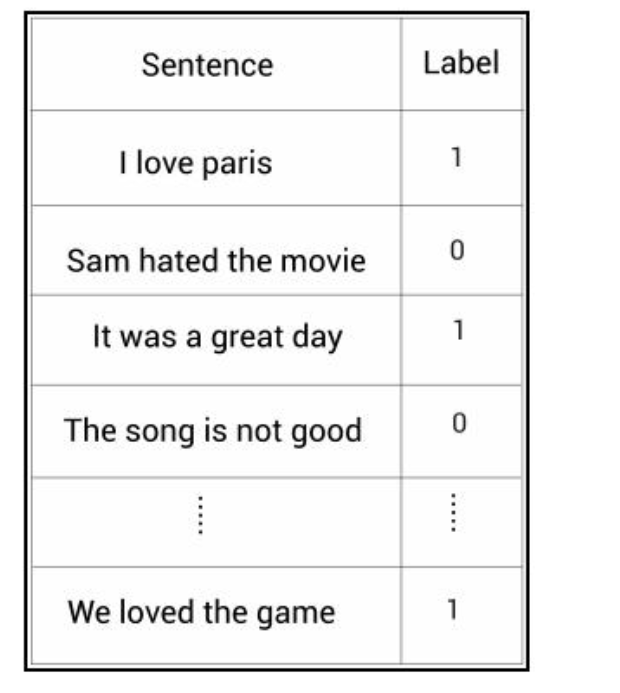

Comme nous pouvons l'observer dans le tableau précédent, nous avons des phrases et leurs étiquettes correspondantes, où 1 indique un sentiment positif et 0 indique un sentiment négatif. 

Nous pouvons entraîner un classificateur à classer le sentiment d'une phrase en utilisant l'ensemble de données donné. Mais nous ne pouvons pas fournir l'ensemble de données donné directement à un classificateur, car il contient du texte. 

Donc d'abord, nous devons vectoriser le texte. Nous pouvons vectoriser le texte en utilisant des méthodes telles que TF-IDF, word2vec et autres. 

Dans le guide précédent, nous avons appris que BERT apprend l'intégration contextuelle, contrairement à d'autres modèles d'intégration sans contexte tels que word2vec. 

Maintenant, nous allons voir comment utiliser le modèle BERT pré-entraîné pour vectoriser les phrases dans notre jeu de données. Prenons la première phrase de notre ensemble de données - I love Paris. Tout d'abord, nous tokenisons la phrase à l'aide du tokenizer WordPiece et obtenons les tokens (mots). Après avoir tokenisé la phrase, nous avons ce qui suit :

tokens = [I, love, Paris]

Maintenant, nous ajoutons le jeton [CLS] au début et le jeton [SEP] à la fin. Ainsi, notre liste de tokens devient ceci :

 tokens = [ [CLS], I, love, Paris, [SEP] ] 
 
 De même, nous pouvons tokeniser toutes les phrases de notre ensemble d'apprentissage. Mais la longueur de chaque phrase varie, n'est-ce pas ? 
 
 Oui, tout comme la longueur des jetons. Nous devons garder la même longueur de tous les jetons. Supposons que nous maintenions la longueur des jetons à 7 pour toutes les phrases de notre ensemble de données. Si nous regardons notre liste de jetons précédente, la longueur des jetons est de 5. Pour que les jetons soient de longueur 7, nous ajoutons un nouveau jeton appelé [PAD]. Ainsi, maintenant nos jetons sont les suivants : 
 
 jetons = [ [CLS], I, love, Paris, [SEP], [PAD], [PAD] ]
 
 Comme nous pouvons le constater, maintenant la longueur de nos jetons est de 7, comme nous l'avons ajouté deux jetons [PAD]. L'étape suivante consiste à faire comprendre à notre modèle que le jeton [PAD] est ajouté uniquement pour correspondre à la longueur des jetons et qu'il ne fait pas partie des jetons réels. 
 
 
 Pour ce faire, nous introduisons un masque d'attention. Nous définissons la valeur du masque d'attention à 1 dans toutes les positions et à 0 à la position où nous avons un jeton [PAD], comme indiqué ici : 
 
 attention_mask = [ 1,1,1,1,1,0,0]
 
 Ensuite, nous mappons tout les jetons à un ID de jeton unique. Supposons que l'identifiant du token mappé soit le suivant : 
 
 token_ids = [101, 1045, 2293, 3000, 102, 0, 0] 
 
 Cela implique que l'ID 101 indique le token [CLS], 1045 indique le token I, 2293 indique le token Paris, et ainsi de suite.


 Maintenant, nous alimentons token_ids avec attention_mask en entrée du modèle BERT pré-entraîné et obtenons la représentation vectorielle (intégration) de chacun des jetons. Cela deviendra plus clair une fois que nous aurons examiné le code. La figure suivante montre comment nous utilisons le modèle BERT pré-entraîné pour obtenir l'intégration. Pour plus de clarté, les jetons sont affichés à la place des ID de jetons. 
 
 Comme on peut le voir, une fois que nous avons alimenté les jetons en entrée, l'encodeur 1 calcule la représentation de tous les jetons et l'envoie à l'encodeur suivant, qui est l'encodeur 2. L'encodeur 2 prend la représentation calculée par l'encodeur 1 en entrée, calcule sa représentation, et l'envoie au prochain encodeur, qui est l'encodeur 3. De cette façon, chaque encodeur envoie sa représentation au prochain encodeur au-dessus de lui. L'encodeur final, qui est l'encodeur 12, renvoie la représentation finale (intégration) de tous les jetons de notre phrase

 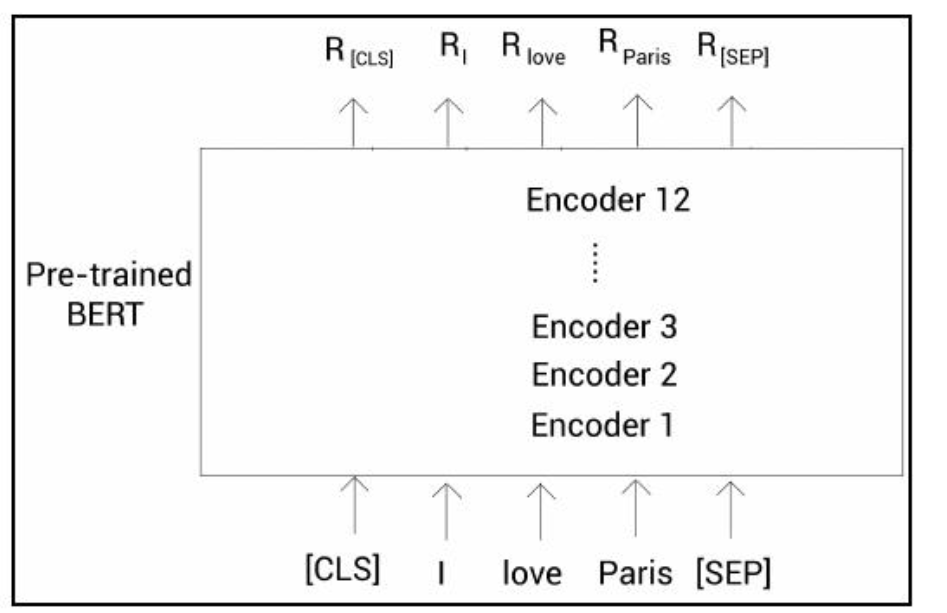

Comme le montre la figure précédente, $R_{[CLS]}$ est l'encastrement du jeton [CLS], $R_{I}$ est l'encastrement du jeton I, $R_{love}$ est l'encastrement du jeton love, et ainsi de suite. Ainsi, de cette manière, on peut obtenir la représentation de chacun des jetons. 

Ces représentations sont fondamentalement les plongements de mots (jeton) contextualisés. Supposons que nous utilisions le modèle de base BERT pré-entraîné ; dans ce cas, la taille de représentation de chaque jeton est de 768. 

Nous avons appris à obtenir la représentation de chaque mot de la phrase I love paris Paris. Mais comment obtient-on la représentation de la phrase complète ?


Nous avons appris que nous avons ajouté le jeton [CLS] au début de notre phrase. La représentation du jeton [CLS] contiendra la représentation globale de la phrase complète. Ainsi, nous pouvons ignorer les intégrations de tous les autres jetons et prendre l'intégration du jeton [CLS] et l'affecter comme représentation de notre phrase. Ainsi, la représentation de notre phrase I love paris n'est que la représentation du jeton [CLS]. 

De manière très similaire, nous pouvons calculer la représentation vectorielle de toutes les phrases dans notre ensemble d'apprentissage. Une fois que nous avons la représentation de phrase de toutes les phrases dans notre ensemble d'entraînement, nous pouvons alimenter ces représentations en entrée et former un classificateur pour effectuer une tâche d'analyse de sentiment. 

Notez qu'utiliser la représentation du jeton [CLS] en tant que représentation de phrase n'est pas toujours une bonne idée. 

Le moyen efficace d'obtenir la représentation d'une phrase consiste soit à faire la moyenne, soit à mettre en commun la représentation de tous les jetons. Nous en apprendrons plus à ce sujet dans les prochains guide. Maintenant que nous avons appris à utiliser le modèle BERT pré-entraîné pour extraire une intégration (représentation), dans la section suivante, nous allons apprendre à le faire à l'aide d'une bibliothèque connue sous le nom de transformateurs.

In [2]:
!pip install transformers

     |████████████████████████████████| 3.1 MB 4.2 MB/s 
     |████████████████████████████████| 59 kB 5.5 MB/s 
     |████████████████████████████████| 3.3 MB 37.5 MB/s 
     |████████████████████████████████| 895 kB 35.6 MB/s 
     |████████████████████████████████| 596 kB 41.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## Générer des plongements BERT

Dans cette section, nous allons apprendre à extraire des plongements du modèle BERT pré-entraîné. Considérez la phrase I love Paris. 

Voyons comment obtenir le word embed contextualisé de tous les mots de la phrase en utilisant le modèle BERT pré-entraîné avec la bibliothèque de transformateurs de Hugging Face. 


In [3]:
from transformers import BertModel, BertTokenizer
import torch

Ensuite, nous téléchargeons le modèle BERT pré-entraîné. Nous pouvons vérifier tous les modèles BERT pré-entraînés disponibles ici –https://huggingface.co/models .Nous utilisons le modèle 'bert-base-uncased'. Comme son nom l'indique, il s'agit du modèle de base BERT avec 12 encodeurs et il est entraîné avec des jetons uncased. 

Puisque nous utilisons BERT-base, la taille de la représentation sera de 768. Téléchargez et chargez le modèle bert-base-uncased pré-entraîné

In [4]:
model = BertModel.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Ensuite, nous téléchargeons et chargeons le tokenizer qui a été utilisé pour pré-entraîner le modèle bert-base-uncased

In [5]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Voyons maintenant comment prétraiter l'entrée avant de la transmettre à BERT

## Prétraitement de input
Définir la phrase:



In [6]:
sentence = 'I love Paris'


Tokenize la phrase et obtenir les tokens:


In [7]:
tokens = tokenizer.tokenize(sentence)
print(tokens)

['i', 'love', 'paris']


Maintenant, nous allons ajouter le token [CLS] au début et le token [SEP] à la fin de la liste des tokens :

In [8]:
tokens = ['[CLS]'] + tokens + ['[SEP]']

Comme nous pouvons le constater, nous avons un jeton [CLS] au début et un jeton [SEP] à la fin de notre liste de jetons. Nous pouvons également voir que la longueur de notre liste de jetons est de 5. 

Disons que nous devons garder la longueur de notre liste de jetons à 7 ; dans ce cas, nous ajoutons deux [PAD]tokens à la fin comme indiqué dans l'extrait suivant :



In [9]:
tokens = tokens + ['[PAD]'] + ['[PAD]']
tokens

['[CLS]', 'i', 'love', 'paris', '[SEP]', '[PAD]', '[PAD]']

Comme on peut le voir , nous avons maintenant la liste des jetons avec les jetons [PAD] et la longueur de notre liste de jetons est de 7.

 Ensuite, nous créons le masque d'attention. Nous définissons la valeur du masque d'attention à 1 si le jeton n'est pas un jeton [PAD], sinon nous définissons le masque d'attention à 0, comme indiqué ici :
 

In [10]:
attention_mask = [1 if i!= '[PAD]' else 0 for i in tokens]
attention_mask


[1, 1, 1, 1, 1, 0, 0]

Comme nous pouvons le voir, nous avons des valeurs de masque d'attention 0 aux positions où ont un jeton [PAD] et 1 à d'autres positions. 


Ensuite, nous convertissons tous les jetons en leurs identifiants de jetons comme suit : 


In [12]:
token_ids = tokenizer.convert_tokens_to_ids(tokens)
token_ids

[101, 1045, 2293, 3000, 102, 0, 0]

À partir de la sortie, nous pouvons observer que chaque jeton est mappé sur un ID de jeton unique. Maintenant, nous convertissons les token_ids et attention_mask en tenseurs, comme indiqué dans le code suivant : 



In [13]:
token_ids = torch.tensor(token_ids).unsqueeze( 0)
attention_mask = torch.tensor(attention_mask).unsqueeze(0)
token_ids

tensor([[ 101, 1045, 2293, 3000,  102,    0,    0]])

C'est tout. Ensuite, nous alimentons token_ids et attention_mask au modèle BERT pré-entraîné et récupérons l'intégration

## Obtenir l'intégration 

Comme indiqué dans le code suivant, nous alimentons token_ids et attention_mask pour modéliser et obtenir les intégrations. 

Notez que model renvoie la sortie sous la forme d'un tuple avec deux valeurs. La première valeur indique la représentation de l'état caché, hidden_rep, et elle consiste en la représentation de tous les jetons obtenus à partir de l'encodeur final (encodeur 12), et la deuxième valeur, cls_head, consiste en la représentation du jeton [CLS] : 

In [28]:
output = model(token_ids, attention_mask = attention_mask)
hidden_rep = output["last_hidden_state"]
cls_head = output["pooler_output"]

 Dans le code précédent, hidden_rep contient l'intégration (représentation) de tous les jetons dans notre entrée. Imprimons la forme de hidden_rep:

In [29]:
print(hidden_rep.shape)

torch.Size([1, 7, 768])


La taille [1,7,768] indique [batch_size, sequence_length, hidden_size]

Notre taille de lot est de 1. La longueur de la séquence est la longueur du jeton. Puisque nous avons 7 jetons, la longueur de la séquence est de 7. La taille cachée est la taille de la représentation (intégration) et elle est de 768 pour le modèle de base BERT.

 On peut obtenir la représentation de chaque token comme suit : 
 
 * hidden_rep[0][0] donne la représentation du premier token, qui est [CLS].
 * hidden_rep[0][1] donne la représentation du second token, qui est I .
 * hidden_repo[0][2] donne la représentation du troisième jeton, qui est love.

De cette façon, nous pouvons obtenir la représentation contextuelle de tous les jetons. Il s'agit essentiellement des incorporations de mots contextualisées de tous les mots de la phrase donnée. 

Voyons maintenant cls_head. Il contient la représentation du jeton [CLS]. Imprimons la forme de cls_head

In [30]:
print(cls_head.shape)

torch.Size([1, 768])


La taille [1,768] indique [batch_size, hidden_size]. Nous avons appris que cls_head contient la représentation agrégée de la phrase, nous pouvons donc utiliser cls_head comme représentation de la phrase I love Paris. 

Nous avons appris à extraire des intégrations du modèle BERT pré-entraîné. Mais ce sont les plongements obtenus uniquement à partir de la couche d'encodeur la plus élevée de BERT, qui est l'encodeur 12. Pouvons-nous également extraire les plongements de toutes les couches d'encodeur de BERT ? Oui! Nous verrons comment procéder dans la section suivante.

## Extraction des intégrations de toutes les couches d'encodeur de BERT

Nous avons appris à extraire l'intégration du modèle BERT pré-entraîné dans la section précédente. Nous avons appris qu'il s'agit des plongements obtenus à partir de la couche finale d'encodeur. Maintenant, la question est de savoir si nous devons considérer les plongements obtenus uniquement à partir de la couche finale d'encodeur (état caché final), ou devons-nous également considérer les plongements obtenus à partir de toutes les couches d'encodeur (tous états cachés) ? Explorons cela

Représentons la couche d'incorporation d'entrée avec $h_0$, la première couche d'encodeur (première couche cachée) avec $h_1$ , la deuxième couche d'encodeur (deuxième couche cachée) avec $h_1$ , et ainsi de suite jusqu'à la douzième couche d'encodeur finale, , comme le montre la figure suivante

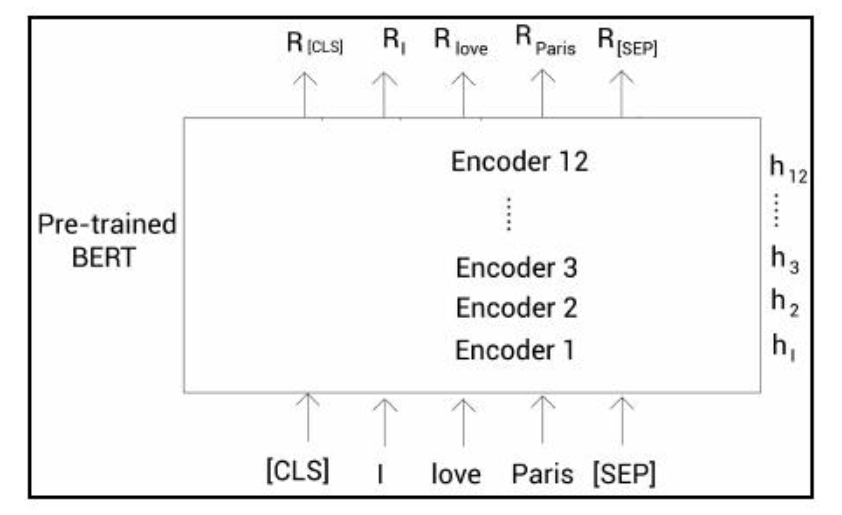

Au lieu de prendre les intégrations (représentations) uniquement à partir de la couche d'encodeur finale, les chercheurs de BERT ont expérimenté en prenant des intégrations à partir de différentes couches d'encodeur. 

Par exemple, pour la tâche NER, les chercheurs ont utilisé le modèle BERT pré-entraîné pour extraire des fonctionnalités. Au lieu d'utiliser uniquement l'intégration de la couche d'encodeur finale (couche cachée finale) en tant que fonctionnalité, ils ont expérimenté l'utilisation d'intégrations d'autres couches d'encodeur (autres couches cachées) en tant que fonctionnalités et ont obtenu le score F1 suivant

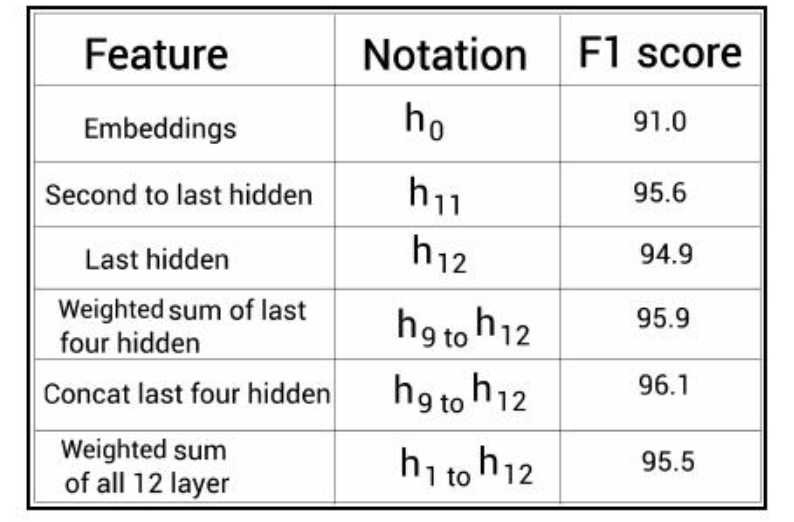

Comme nous pouvons l'observer à partir du tableau précédent, la concaténation des plongements des quatre dernières couches d'encodeur (quatre dernières couches cachées) nous donne un score F1 plus élevé de 96,1%. Ainsi, au lieu de prendre uniquement les plongements de la couche d'encodeur finale (couche cachée finale), nous pouvons également utiliser les plongements des autres couches d'encodeur. Maintenant, nous allons apprendre à extraire les plongements de toutes les couches d'encodeur en utilisant la bibliothèque de transformateurs

## Obtenir les incorporations 

Tout d'abord, importons les modules nécessaires : à partir des transformateurs, importez BertModel, BertTokenizer, importez la torche Ensuite, téléchargez le modèle BERT pré-entraîné et le tokenizer.

Comme nous pouvons le voir, lors du téléchargement du modèle BERT pré-entraîné, nous devons définir output_hidden_states = True. Définir ce paramètre sur True nous aide à obtenir des plongements de toutes les couches d'encodeur




In [31]:
model = BertModel.from_pretrained('bert-base-uncased',                                  
                                  output_hidden_states = True)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Puisque nous avons défini output_hidden_states = True lors de la définition du modèle pour obtenir les incorporations de toutes les couches d'encodeur, maintenant le modèle renvoie un tuple de sortie avec trois valeurs, comme indiqué dans le code suivant

In [36]:
output = model(token_ids, attention_mask = attention_mask)

last_hidden_state = output["last_hidden_state"]
pooler_output = output["pooler_output"]
hidden_states = output['hidden_states']

La première valeur, 

* last_hidden_state, contient la représentation de tous les jetons obtenus uniquement à partir de la couche de codeur finale (codeur 12). Ensuite, 
* pooler_output indique la représentation du jeton [CLS] de la couche d'encodeur finale, qui est ensuite traitée par une fonction d'activation linéaire et tanh. 
* hidden_states contient la représentation de tous les jetons obtenus à partir de toutes les couches d'encodeur

Examinons maintenant chacune de ces valeurs et comprenons-les plus en détail. Tout d'abord, regardons last_hidden_state. Comme nous l'avons appris, il contient la représentation de tous les jetons obtenus uniquement à partir de la couche d'encodeur finale (encodeur 12). Imprimons la forme delast_hidden_state

In [33]:
last_hidden_state.shape

torch.Size([1, 7, 768])

Ensuite, nous avons pooler_output, qui contient la représentation du jeton [CLS] de la couche d'encodeur finale

Enfin, nous avons hidden_states, qui contient la représentation de tous les jetons obtenus à partir de toutes les couches d'encodeur. C'est un tuple contenant 13 valeurs contenant la représentation de toutes les couches d'encodeur (couches cachées), de la couche d'intégration d'entrée à la couche d'encodeur finale

In [37]:
len(hidden_states)

13

Comme nous pouvons le voir, il contient 13 valeurs contenant la représentation de toutes les couches : 

* hidden_states[0] contient la représentation de tous les jetons obtenus à partir de la couche d'intégration d'entrée $h_0$.

* hidden_states[1] contient la représentation de tous les jetons obtenus à partir de la première couche d'encodeur. 
* hidden_states[2] contient la représentation de tous les jetons obtenus à partir de la deuxième couche d'encodeur .
* hidden_states[12] contient la représentation de tous les jetons obtenus à partir de la couche finale d'encodeur